In [175]:
from sklearn.metrics import mean_squared_error, auc, accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split 

import xgboost as xgb 

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt

In [176]:
df = pd.read_excel('base-nan.xlsx', na_values='-', index_col=0)

In [177]:
X = df.drop('Исход', 1) 
y = df['Исход']

/var/folders/pt/1nd8f39x3h116nnrbqlgpbdw0000gn/T/ipykernel_14889/50795730.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Исход', 1)


In [178]:
dm = xgb.DMatrix(data=X,label=y)

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify = y, test_size=0.3,random_state=0)

In [180]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[ 78  21]
 [ 13 166]]


In [181]:
y_pred_proba = xgb_model.predict_proba(X_test)[::,1]

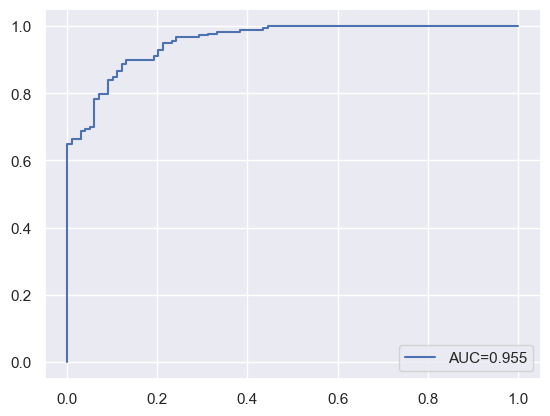

Accuracy: 0.8776978417266187
Precision 0.8877005347593583
Recall: 0.9273743016759777


In [202]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str('%.3f' % auc))
plt.legend(loc=4)
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision",metrics.precision_score(y_test, y_pred))
print ("Recall:",metrics.recall_score(y_test, y_pred))

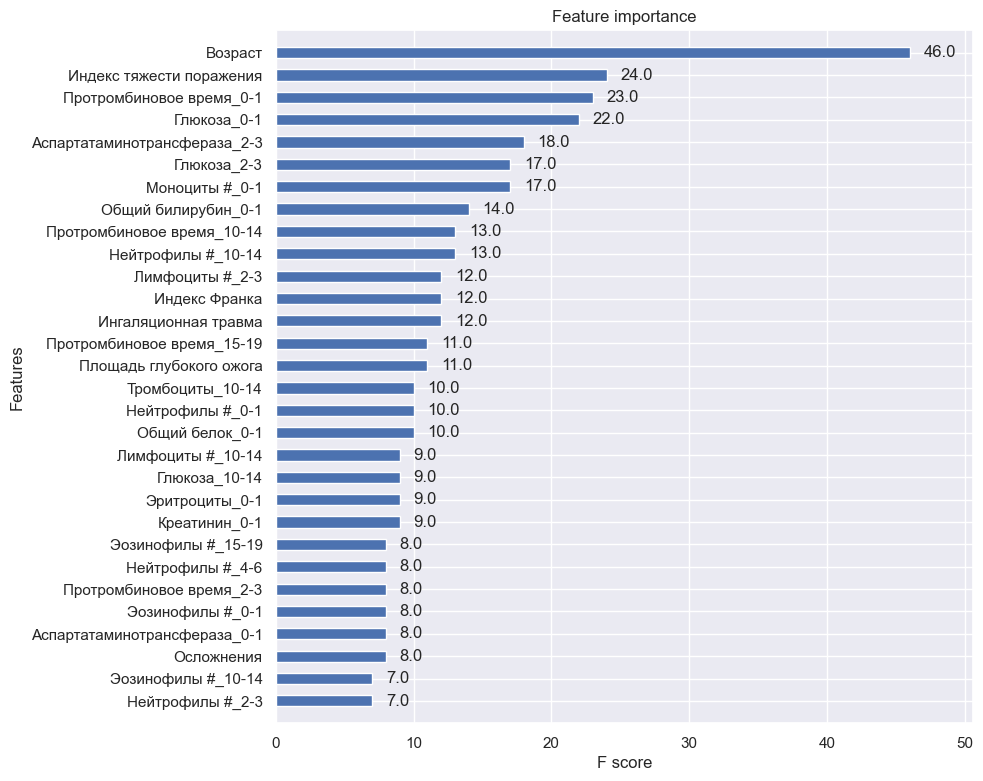

In [161]:
fig, ax = plt.subplots(figsize=(9,9))
xgb.plot_importance(xgb_model, max_num_features=30, height=0.5, ax=ax, importance_type='weight')
plt.show()

Text(0, 0.5, 'Плотность распределения')

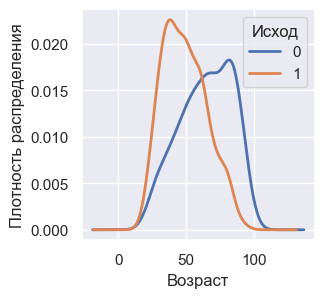

In [142]:
data_wide = df.pivot(columns = 'Исход',
                     values = 'Возраст')
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (3, 3), linewidth = 2)
plt.xlabel('Возраст')
plt.ylabel('Плотность распределения')

Text(0, 0.5, 'Плотность распределения')

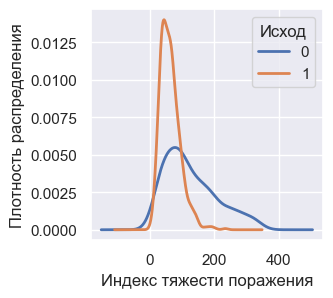

In [143]:
data_wide = df.pivot(columns = 'Исход',
                     values = 'Индекс тяжести поражения')
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (3, 3),
                   linewidth = 2)
plt.xlabel('Индекс тяжести поражения')
plt.ylabel('Плотность распределения')

Text(0, 0.5, 'Плотность распределения')

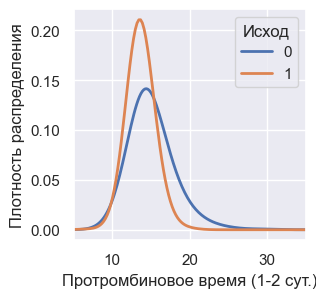

In [192]:
data_wide = df.pivot(columns = 'Исход',
                     values = 'Протромбиновое время_0-1')
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (3, 3),
                   linewidth = 2)

plt.xlim (5, 35)
plt.xlabel('Протромбиновое время (1-2 сут.)')
plt.ylabel('Плотность распределения')

Text(0, 0.5, 'Плотность распределения')

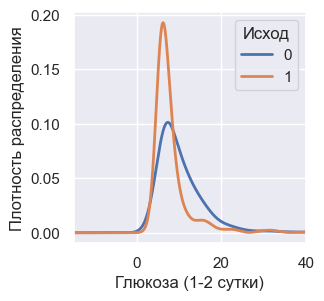

In [197]:
data_wide = df.pivot(columns = 'Исход',
                     values = 'Глюкоза_0-1')
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (3, 3),
                   linewidth = 2)
plt.xlim (-15, 40)
plt.xlabel('Глюкоза (1-2 сутки)')
plt.ylabel('Плотность распределения')

Text(0, 0.5, 'Плотность распределения')

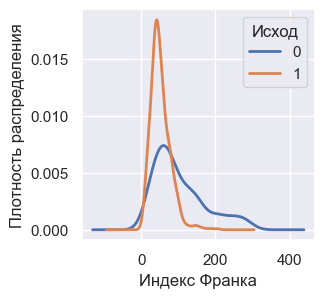

In [146]:
data_wide = df.pivot(columns = 'Исход',
                     values = 'Индекс Франка')
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (3, 3),
                   linewidth = 2)
plt.xlabel('Индекс Франка')
plt.ylabel('Плотность распределения')

Text(0, 0.5, 'Плотность распределения')

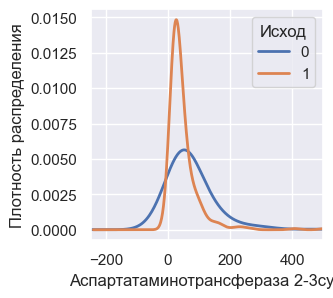

In [196]:
data_wide = df.pivot(columns = 'Исход',
                     values = 'Аспартатаминотрансфераза_2-3')
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (3, 3),
                   linewidth = 2)
plt.xlim (-250, 500)
plt.xlabel('Аспартатаминотрансфераза 2-3сут.')
plt.ylabel('Плотность распределения')